In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
nltk.download('wordnet')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,\
HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/natehiatt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/natehiatt/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/natehiatt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [62]:
tokenizer = RegexpTokenizer(r"(?u)\w{3,}")
stopwords = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocessing(text, tokenizer, stopwords, lemmatizer):
    # Lower case
    text = text.lower()
    
    # Tokenize
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords
    tokens =  [token for token in tokens if token not in stopwords]
    
    # Lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [71]:
df = pd.read_csv('../data/final_df.csv')
df.drop(columns=["text_lower", "link", "list_tokens", "string_tokens"], inplace=True)
df["Target"] = df["Target"].astype('int')


df

,Year,Name,Text,Target
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0
...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1


In [72]:
df['Text'] = df['Text'].astype(str)
tokenized_df = df['Text'].apply((lambda x: preprocessing(x, tokenizer, stopwords, lemmatizer)))
df['tokens'] = tokenized_df
df

,Year,Name,Text,Target,tokens
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn..."
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest..."
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[donald, applause, well, thank, lester, thanks..."
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, jim, thanks, peo..."
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, jim, thank, people, hartford, host, wa..."
...,...,...,...,...,...
114,2005,BUSH,"Vice President Cheney, Mr. Chief Justice, Pres...",1,"[vice, president, cheney, chief, justice, pres..."
115,2009,OBAMA,"My fellow citizens, I stand here today humbled...",0,"[fellow, citizen, stand, today, humbled, task,..."
116,2013,OBAMA,Thank you. Thank you so much. Vice President B...,0,"[thank, thank, much, vice, president, biden, c..."
117,2017,TRUMP,"Chief Justice Roberts, President Carter, Presi...",1,"[chief, justice, robert, president, carter, pr..."


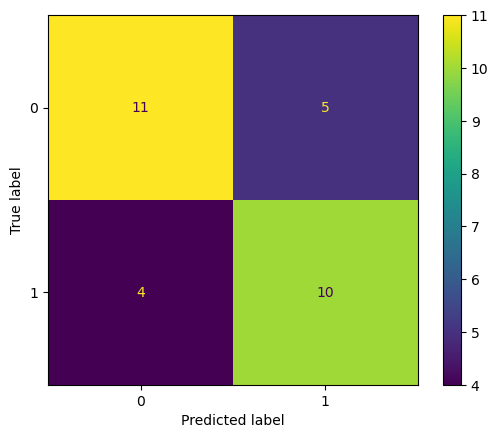

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

X = df[["tokens"]]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# make into sparse matrices
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test = vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)

# Naive Bayes

clf = GaussianNB()
clf.fit(X_train_tfidf.toarray(), y_train)
y_pred = clf.predict(X_test_tfidf.toarray())

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()







[[0.52445492 0.47554508]
 [0.49403541 0.50596459]
 [0.53109096 0.46890904]
 [0.60635711 0.39364289]
 [0.62629435 0.37370565]
 [0.56299226 0.43700774]
 [0.43799726 0.56200274]
 [0.60521568 0.39478432]
 [0.4738473  0.5261527 ]
 [0.47626462 0.52373538]
 [0.48196246 0.51803754]
 [0.48738851 0.51261149]
 [0.55838307 0.44161693]
 [0.52124055 0.47875945]
 [0.62954939 0.37045061]
 [0.5406272  0.4593728 ]
 [0.56890459 0.43109541]
 [0.44774221 0.55225779]
 [0.42775658 0.57224342]
 [0.4544712  0.5455288 ]
 [0.62739798 0.37260202]
 [0.65259189 0.34740811]
 [0.55291484 0.44708516]
 [0.58297843 0.41702157]
 [0.56354759 0.43645241]
 [0.44527025 0.55472975]
 [0.45618415 0.54381585]
 [0.51099055 0.48900945]
 [0.52944538 0.47055462]
 [0.48738163 0.51261837]]


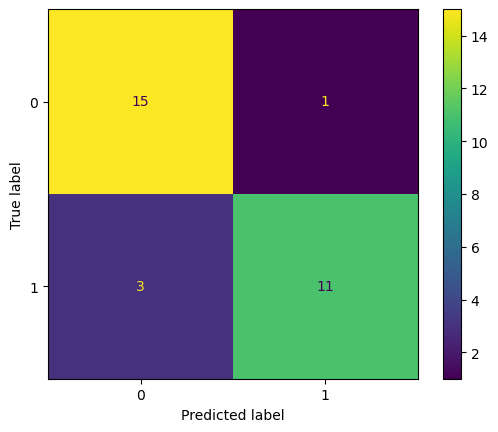

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

X = df[["tokens"]]
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# make into sparse matrices
"""
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test = vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_test_tfidf = tfidf_transformer.transform(X_test)
"""
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train["tokens"].apply(lambda x: " ".join(x)))
X_test_tfidf = tfidf_vectorizer.transform(X_test["tokens"].apply(lambda x: " ".join(x)))

# Naive Bayes

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# print multinomial probabilities 
print(clf.predict_proba(X_test_tfidf))






In [114]:

df["tfidf_score"] = tfidf_vectorizer.transform(df["tokens"].apply(lambda x: " ".join(x)))


TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

sklearn.naive_bayes.MultinomialNB